In [2]:
#Import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load the data set
df = pd.read_csv(r"Data sets\tmdb.movies.csv")
df.head()

Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533     19-11-10   
1                      How to Train Your Dragon      28.734     26-03-10   
2                                    Iron Man 2      28.515     07-05-10   
3                                     Toy Story      28.005     22-11-95   
4                                     Inception      27.920     16-07-10   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  
2                                    Iron Man 2           6.8       12368  
3                                     Toy Story           7.9       10174  
4                                     Inception           8.3       22186

In [6]:
#Displays the number of rows and columns
print("Dataset shape:", df.shape)

Dataset shape: (26517, 10)


In [7]:
# Quick summary of data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [8]:
# Convert release_date to datetime object
#This allows you to analyze trends by year/month and sort by release date.
df["release_date"] = pd.to_datetime(df["release_date"], format="%d-%m-%y", errors="coerce")
#errors="coerce" will set invalid dates to NaT (missing) so they don't crash your code.


In [9]:
#Create a genre ID to name map

genre_map = {
    28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy',
    80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family',
    14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music',
    9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction',
    10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'
}


In [10]:
import ast

# Convert genre_ids string to list, then map to genre names
df["genres"] = df["genre_ids"].apply(lambda x: [genre_map.get(i, "Unknown") for i in ast.literal_eval(x)])


In [11]:

# Check for missing values in each column
print(" Missing values:\n", df.isnull().sum())

# Exclude the 'genres' column (contains unhashable lists) when checking for duplicates
df_no_list = df.drop(columns=["genres"])

# Check for duplicate rows (excluding unhashable list columns)
duplicate_count = df_no_list.duplicated().sum()
print(f" Duplicate rows: {duplicate_count}")

# Drop duplicate rows based on id, title, and release_date (common unique identifiers)
df = df.drop_duplicates(subset=["id", "title", "release_date"])

# Reset index after dropping
df.reset_index(drop=True, inplace=True)


 Missing values:
 Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
genres               0
dtype: int64
 Duplicate rows: 0


In [12]:
#Final Check (Print Cleaned Sample)
df_cleaned = df[["title", "genres","id","popularity", "vote_average", "vote_count", "release_date"]]

df_cleaned.head()

title  \
0  Harry Potter and the Deathly Hallows: Part 1   
1                      How to Train Your Dragon   
2                                    Iron Man 2   
3                                     Toy Story   
4                                     Inception   

                                    genres     id  popularity  vote_average  \
0             [Adventure, Fantasy, Family]  12444      33.533           7.7   
1  [Fantasy, Adventure, Animation, Family]  10191      28.734           7.7   
2     [Adventure, Action, Science Fiction]  10138      28.515           6.8   
3              [Animation, Comedy, Family]    862      28.005           7.9   
4     [Action, Science Fiction, Adventure]  27205      27.920           8.3   

   vote_count release_date  
0       10788   2010-11-19  
1        7610   2010-03-26  
2       12368   2010-05-07  
3       10174   1995-11-22  
4       22186   2010-07-16

In [13]:
#Identify which genres are most commonly associated with high popularity and strong audience ratings.
## Step 1: Explode genres to separate rows
df_exploded = df_cleaned.explode('genres')

# Ensure df_cleaned is a true copy
df_cleaned = df_cleaned.copy()

# Step 2: Group and aggregate
genre_stats = df_exploded.groupby('genres').agg({
    'popularity': 'mean',
    'vote_average': 'mean',
    'title': 'count'  # Movie count per genre
}).rename(columns={'title': 'movie_count'}).reset_index()

# Step 3: Sort by popularity (optional)
genre_stats = genre_stats.sort_values(by='popularity', ascending=False)

# Preview result
print(genre_stats.head())


       genres  popularity  vote_average  movie_count
1   Adventure    7.319163      5.901574         1334
0      Action    6.341359      5.573362         2534
8     Fantasy    6.180947      5.910628         1082
4       Crime    5.335119      5.834292         1426
17        War    5.135217      6.221384          318


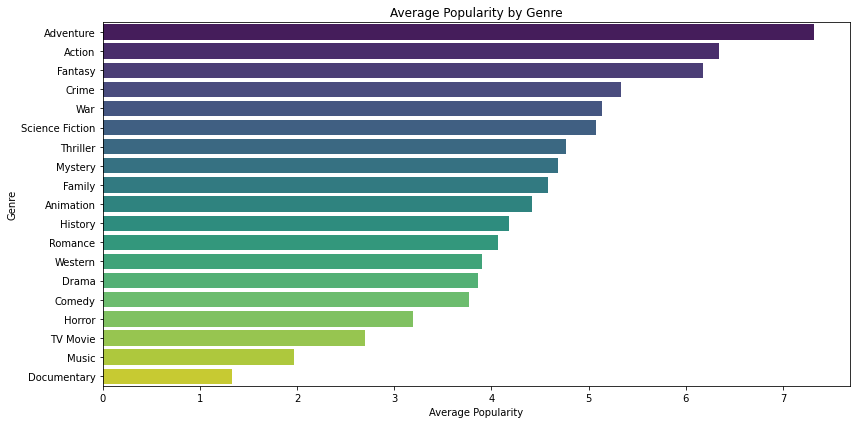

In [14]:
## Barplot: Average popularity per genre
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_stats, x='popularity', y='genres', palette='viridis')
plt.title('Average Popularity by Genre')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

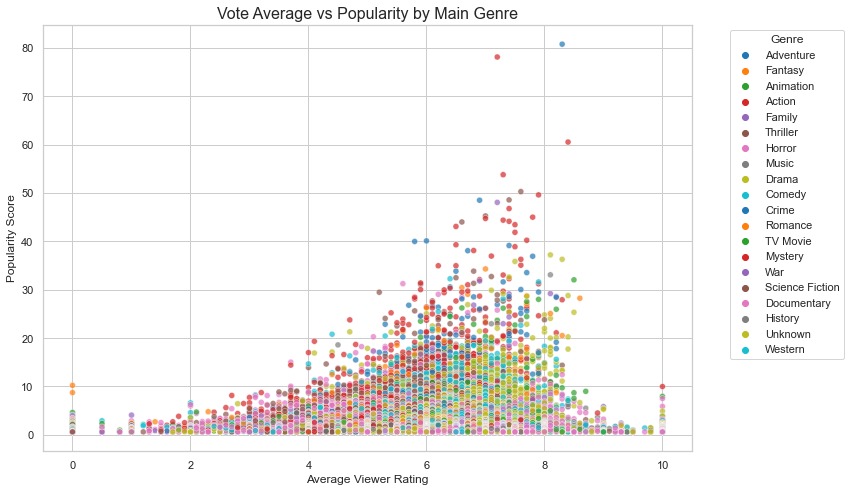

In [15]:
#The relationship between vote_average (viewer reception) and popularity
# Create a simplified genre column with the first genre only
df_cleaned["main_genre"] = df_cleaned["genres"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else "Unknown")

# Ensure df_cleaned is a true copy
df_cleaned = df_cleaned.copy()

# Set plot size and style
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")

# Scatter plot
sns.scatterplot(
    data=df_cleaned,
    x="vote_average",
    y="popularity",
    hue="main_genre",
    alpha=0.7,
    palette="tab10"
)

# Titles and labels
plt.title("Vote Average vs Popularity by Main Genre", fontsize=16)
plt.xlabel("Average Viewer Rating", fontsize=12)
plt.ylabel("Popularity Score", fontsize=12)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Exploring release trends by year to see how audience preferences have evolved and which periods are linked with successful releases.
#use Genre to get more famous moves overtime and to date

Vote Count Statistics:
 count    25497.000000
mean       178.795780
std        914.150311
min          1.000000
25%          1.000000
50%          5.000000
75%         25.000000
max      22186.000000
Name: vote_count, dtype: float64


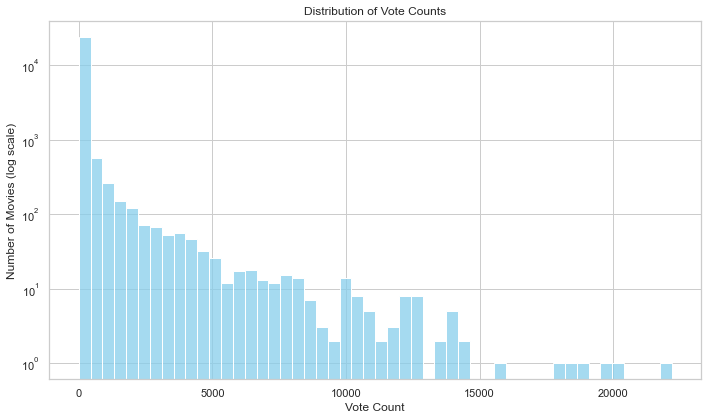

In [16]:
#Reviewing vote counts to measure audience engagement and interest — higher vote counts often signal broader reach and buzz.
# Basic statistics of vote_count
print("Vote Count Statistics:\n", df_cleaned['vote_count'].describe())

# Visualize distribution of vote counts (log scale to manage skew)
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['vote_count'], bins=50, log_scale=(False, True), color='skyblue')
plt.title('Distribution of Vote Counts')
plt.xlabel('Vote Count')
plt.ylabel('Number of Movies (log scale)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:

import plotly.express as px

# Explore genres (assuming genres is a list column)
df_exploded = df_cleaned.explode('genres')

# Convert release_date to datetime and extract release_year
df_exploded['release_date'] = pd.to_datetime(df_exploded['release_date'], errors='coerce')
df_exploded['release_year'] = df_exploded['release_date'].dt.year

# Remove rows with missing release_year or genres
df_exploded = df_exploded.dropna(subset=['release_year', 'genres'])

# Remove empty strings in genres
df_exploded = df_exploded[df_exploded['genres'].astype(str).str.strip() != '']

# Now create the scatter plot
fig = px.scatter(
    df_exploded,
    x='popularity',
    y='vote_average',
    size='vote_count',
    color='genres',
    hover_name='title',
    animation_frame='release_year',
    size_max=30,
    title='Top Movie Performers: Popularity vs Vote Average Over Years',
    labels={
        'popularity': 'Popularity',
        'vote_average': 'Average Vote',
        'genres': 'Genre',
        'release_year': 'Release Year'
    }
)

fig.update_layout(transition={'duration': 500})
fig.show()

The animated scatter plot shows how movie popularity and average viewer ratings vary across genres and over the years, highlighting trends in audience reception. Larger points indicate films with higher vote counts, reflecting greater audience engagement and buzz for specific genres during different release periods.